<a href="https://colab.research.google.com/github/yassine-cherni/NLP/blob/main/RNN_LSTM_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa
!pip install librosa resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.5 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [4]:
!pip install librosa
!pip install librosa resampy
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define the path to the directory containing your audio files
audio_dataset_path = "/content/drive/MyDrive/DATA/AUDIO"

# Define a fixed length for MFCCs
max_length = 100  # Adjust this value as needed

# Function to extract MFCC features from audio files and pad or truncate them to a fixed length
def extract_features(file_name, max_length=max_length):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Pad or truncate the features to the fixed length
    if mfccs.shape[1] < max_length:
        # Pad the features with zeros
        mfccs_padded = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
        return mfccs_padded
    else:
        # Truncate the features
        return mfccs[:, :max_length]

# Initialize lists to store extracted features and labels
features_list = []
labels_list = []

# Iterate through each directory (class label)
for class_label in os.listdir(audio_dataset_path):
    # Construct the path to the current class label directory
    class_dir_path = os.path.join(audio_dataset_path, class_label)

    # Check if the current item in the directory is a directory itself
    if os.path.isdir(class_dir_path):
        # Iterate through each audio file in the class label directory
        for audio_file in os.listdir(class_dir_path):
            # Construct the file path
            file_name = os.path.join(class_dir_path, audio_file)
            # Extract features from the audio file and pad or truncate them
            features = extract_features(file_name)

            # Append the extracted features and label to the lists
            features_list.append(features)
            labels_list.append(class_label)

# Convert lists to NumPy arrays
X = np.array(features_list)
y = np.array(labels_list)

# Reshape features for LSTM input (add time dimension)
X = np.expand_dims(X, axis=3)

# Convert class labels to one-hot encoded format
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the RNN-LSTM model
model = Sequential([
    LSTM(units=256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(units=128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

In [6]:
# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
101/101 [==============================] - 60s 537ms/step - loss: 1.2136 - accuracy: 0.5096 - val_loss: 0.5371 - val_accuracy: 0.7711
Epoch 2/50
101/101 [==============================] - 44s 433ms/step - loss: 0.5572 - accuracy: 0.7755 - val_loss: 0.2715 - val_accuracy: 0.9008
Epoch 3/50
101/101 [==============================] - 43s 424ms/step - loss: 0.3714 - accuracy: 0.8829 - val_loss: 0.1901 - val_accuracy: 0.9364
Epoch 4/50
101/101 [==============================] - 43s 424ms/step - loss: 0.2632 - accuracy: 0.9240 - val_loss: 0.2205 - val_accuracy: 0.9339
Epoch 5/50
101/101 [==============================] - 42s 414ms/step - loss: 0.2250 - accuracy: 0.9392 - val_loss: 0.2051 - val_accuracy: 0.9401
Epoch 6/50
101/101 [==============================] - 45s 442ms/step - loss: 0.1975 - accuracy: 0.9431 - val_loss: 0.1473 - val_accuracy: 0.9576
Epoch 7/50
101/101 [==============================] - 43s 429ms/step - loss: 0.1859 - accuracy: 0.9470 - val_loss: 0.3114 - val_ac

51/51 [==============================] - 4s 76ms/step - loss: 0.0721 - accuracy: 0.9857
Test Loss: 0.07214310020208359
Test Accuracy: 0.9856519103050232


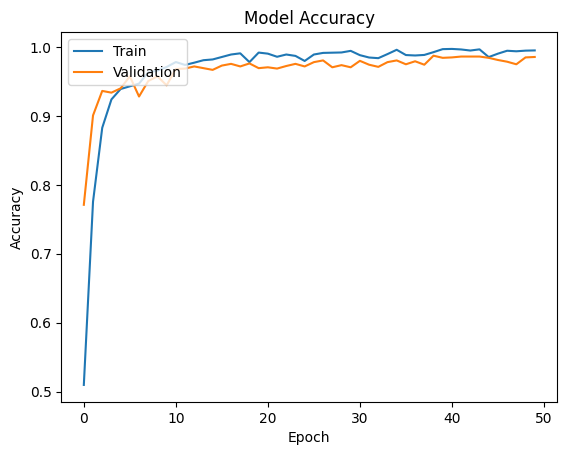

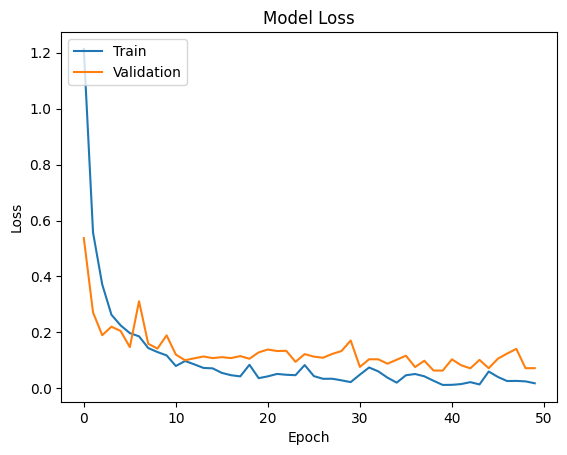

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

51/51 [==============================] - 8s 108ms/step


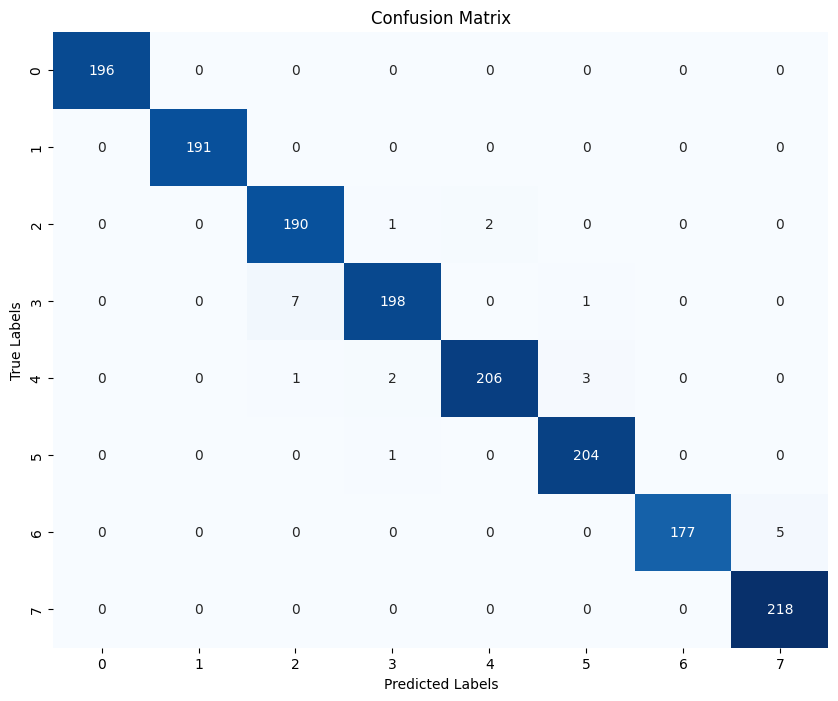

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       191
           2       0.96      0.98      0.97       193
           3       0.98      0.96      0.97       206
           4       0.99      0.97      0.98       212
           5       0.98      1.00      0.99       205
           6       1.00      0.97      0.99       182
           7       0.98      1.00      0.99       218

    accuracy                           0.99      1603
   macro avg       0.99      0.99      0.99      1603
weighted avg       0.99      0.99      0.99      1603



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate and print classification report
class_report = classification_report(y_test_labels, y_pred_classes)
print("Classification Report:")
print(class_report)

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/DATA/BEST_RNN_LSTM_model.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           365568    
                                                                 
 dropout (Dropout)           (None, 40, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 5